In [1]:
import pandas as pd
import numpy as np


In [2]:
S5=pd.read_csv(r'I:\Chandra J\Python\Kabbadi_Data\Season5.csv')
S6=pd.read_csv(r'I:\Chandra J\Python\Kabbadi_Data\Season6.csv')
S7=pd.read_csv(r'I:\Chandra J\Python\Kabbadi_Data\Season7.csv')

In [3]:
S5=S5.drop('Unnamed: 0',axis=1)
S6=S6.drop('Unnamed: 0',axis=1)
S7=S7.drop('Unnamed: 0',axis=1)

## Linear Regression Model 


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

var=['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points']

S5[var]=scaler.fit_transform(S5[var])

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Team winner Prediction

In [5]:

X_train=S5[['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded']]

y_train=S5['Total Points']

In [6]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Points   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     327.9
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           0.000253
Time:                        12:06:31   Log-Likelihood:                 40.811
No. Observations:                  12   AIC:                            -63.62
Df Residuals:                       3   BIC:                            -59.26
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Points Conceded,42.64
6,Inflicted,18.99
0,MatchesPlayed,16.14
3,Successful Tackles,14.79
2,Successful Raids,13.95
7,Conceded,13.11
5,Super Tackles,8.51
4,Super Raid,5.93


In [8]:
X = X_train.drop('Total Points Conceded', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Points   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     485.4
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.09e-05
Time:                        12:06:35   Log-Likelihood:                 40.639
No. Observations:                  12   AIC:                            -65.28
Df Residuals:                       4   BIC:                            -61.40
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0559      0

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [9]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Inflicted,16.94
0,MatchesPlayed,13.01
1,Successful Raids,11.77
2,Successful Tackles,7.02
4,Super Tackles,6.60
3,Super Raid,5.57
6,Conceded,4.05


In [10]:
X = X.drop('Conceded', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Points   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     471.2
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.03e-06
Time:                        12:06:39   Log-Likelihood:                 38.200
No. Observations:                  12   AIC:                            -62.40
Df Residuals:                       5   BIC:                            -59.01
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0176      0

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


Text(0.5, 0, 'Errors')

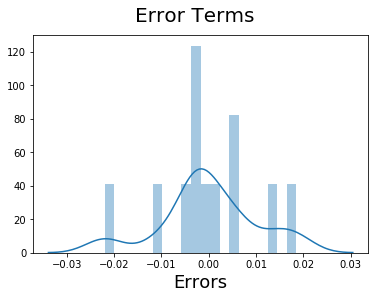

In [11]:
y_train_pred=lr_2.predict(X_train_lm)
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'y_pred')

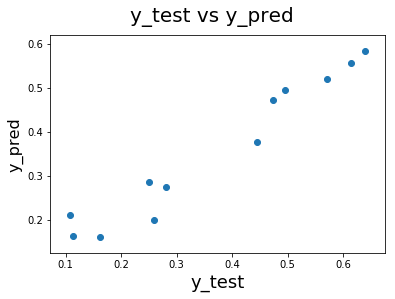

In [12]:
S6_var=['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points']
S6[S6_var]=scaler.transform(S6[S6_var])
X_test_S6=S6[['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded']]
y_test_S6=S6['Total Points'] 
X_test_m6=sm.add_constant(X_test_S6)
X_test_m6=X_test_m6.drop(['Total Points Conceded','Conceded'],1)
y_pred_test_S6=lr_2.predict(X_test_m6)
fig = plt.figure()
plt.scatter(y_test_S6, y_pred_test_S6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [13]:
y_pred_test_S6

0     0.582918
1     0.555792
2     0.520442
3     0.495641
4     0.472437
5     0.376267
6     0.275166
7     0.200544
8     0.286488
9     0.161245
10    0.162475
11    0.211590
dtype: float64

## Predicting Season 7 -  Team winner


C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'y_pred')

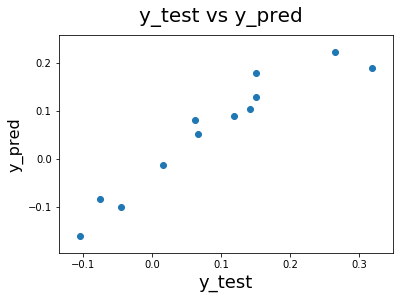

In [14]:
S7_var=['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points']
S7[S7_var]=scaler.transform(S7[S7_var])
X_test_S7=S7[['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded']]
y_test_S7=S7['Total Points'] 
X_test_m7=sm.add_constant(X_test_S7)
X_test_m7=X_test_m7.drop(['Total Points Conceded','Conceded'],1)
y_pred_test_S7=lr_2.predict(X_test_m7)
fig = plt.figure()
plt.scatter(y_test_S7, y_pred_test_S7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [15]:
S7_pred=S7
S7_pred['Predicted']=y_pred_test_S7
S7_pred

,Team,Total Points,MatchesPlayed,Total Points Conceded,Successful Raids,Successful Tackles,Super Raid,Super Tackles,Inflicted,Conceded,Predicted
0,Dabang Delhi K.C.,0.318584,-0.5,0.064286,0.382353,0.236559,0.142857,-0.117647,0.432432,0.052632,0.189428
1,Bengal Warriors,0.265487,-0.5,-0.064286,0.279412,0.247312,0.476190,0.117647,0.432432,0.000000,0.222394
2,Patna Pirates,0.150442,-0.5,0.107143,0.098039,0.161290,0.380952,0.823529,0.270270,0.368421,0.179262
3,Bengaluru Bulls,0.150442,-0.5,0.067857,0.127451,0.096774,0.142857,0.882353,0.135135,0.421053,0.128139
4,Haryana Steelers,0.141593,-0.5,0.025000,0.034314,0.236559,0.428571,0.235294,0.270270,0.315789,0.102822
5,Puneri Paltan,0.119469,-0.5,0.292857,0.034314,0.516129,0.047619,0.882353,0.000000,0.842105,0.088450
6,U Mumba,0.066372,-0.5,-0.192857,-0.049020,0.161290,0.095238,0.529412,0.243243,0.210526,0.051400
7,Jaipur Pink Panthers,0.061947,-0.5,0.010714,-0.107843,0.322581,0.095238,1.294118,0.027027,0.315789,0.079669
8,Gujarat Fortunegiants,0.015487,-0.5,-0.178571,-0.088235,0.301075,0.000000,0.411765,0.081081,0.263158,-0.014183
9,Tamil Thalaivas,-0.044248,-0.5,0.192857,-0.039216,0.010753,-0.047619,0.176471,-0.108108,0.684211,-0.101074


## Bengal Warriors - Team winner

## Successful Raids prediction

In [16]:
X_train=S5[['MatchesPlayed','Total Points Conceded','Total Points','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded']]

y_train=S5['Successful Raids']

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())



                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     49.92
Date:                Wed, 02 Oct 2019   Prob (F-statistic):            0.00417
Time:                        12:06:54   Log-Likelihood:                 28.968
No. Observations:                  12   AIC:                            -39.94
Df Residuals:                       3   BIC:                            -35.57
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [17]:
X = X_train.drop('Total Points Conceded', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     71.40
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           0.000490
Time:                        12:06:56   Log-Likelihood:                 28.591
No. Observations:                  12   AIC:                            -41.18
Df Residuals:                       4   BIC:                            -37.30
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1568      0

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [18]:
X = X.drop('Conceded', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     69.13
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           0.000120
Time:                        12:06:58   Log-Likelihood:                 26.158
No. Observations:                  12   AIC:                            -38.32
Df Residuals:                       5   BIC:                            -34.92
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0548      0

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


Text(0.5, 0, 'Errors')

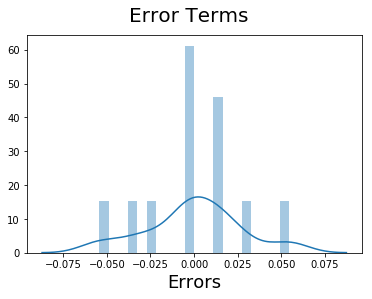

In [19]:
y_train_pred=lr_2.predict(X_train_lm)
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0, 0.5, 'y_pred')

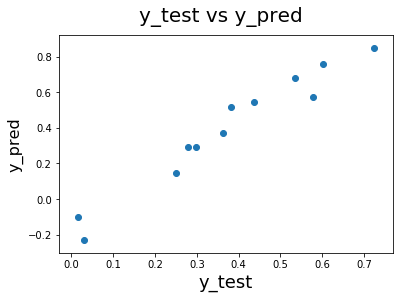

In [20]:
#S6_var=['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points']
#S6[S6_var]=scaler.transform(S6[S6_var])
X_test_S6=S6[['MatchesPlayed','Total Points Conceded','Total Points','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded']]
y_test_S6=S6['Successful Raids'] 
X_test_m6=sm.add_constant(X_test_S6)
X_test_m6=X_test_m6.drop(['Total Points Conceded','Conceded'],1)
y_pred_test_S6=lr_2.predict(X_test_m6)
fig = plt.figure()
plt.scatter(y_test_S6, y_pred_test_S6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

Text(0, 0.5, 'y_pred')

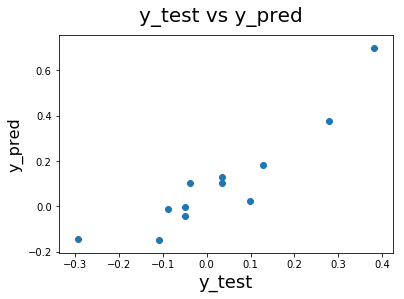

In [21]:
X_test_S7=S7[['MatchesPlayed','Total Points Conceded','Total Points','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded']]
y_test_S7=S7['Successful Raids'] 
X_test_m7=sm.add_constant(X_test_S7)
X_test_m7=X_test_m7.drop(['Total Points Conceded','Conceded'],1)
y_pred_test_S7=lr_2.predict(X_test_m7)
fig = plt.figure()
plt.scatter(y_test_S7, y_pred_test_S7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [22]:
S7_pred=S7
S7_pred['Predicted']=y_pred_test_S7
S7_pred

,Team,Total Points,MatchesPlayed,Total Points Conceded,Successful Raids,Successful Tackles,Super Raid,Super Tackles,Inflicted,Conceded,Predicted
0,Dabang Delhi K.C.,0.318584,-0.5,0.064286,0.382353,0.236559,0.142857,-0.117647,0.432432,0.052632,0.697013
1,Bengal Warriors,0.265487,-0.5,-0.064286,0.279412,0.247312,0.476190,0.117647,0.432432,0.000000,0.375254
2,Patna Pirates,0.150442,-0.5,0.107143,0.098039,0.161290,0.380952,0.823529,0.270270,0.368421,0.022567
3,Bengaluru Bulls,0.150442,-0.5,0.067857,0.127451,0.096774,0.142857,0.882353,0.135135,0.421053,0.183930
4,Haryana Steelers,0.141593,-0.5,0.025000,0.034314,0.236559,0.428571,0.235294,0.270270,0.315789,0.130811
5,Puneri Paltan,0.119469,-0.5,0.292857,0.034314,0.516129,0.047619,0.882353,0.000000,0.842105,0.102616
6,U Mumba,0.066372,-0.5,-0.192857,-0.049020,0.161290,0.095238,0.529412,0.243243,0.210526,-0.003595
7,Jaipur Pink Panthers,0.061947,-0.5,0.010714,-0.107843,0.322581,0.095238,1.294118,0.027027,0.315789,-0.146873
8,Gujarat Fortunegiants,0.015487,-0.5,-0.178571,-0.088235,0.301075,0.000000,0.411765,0.081081,0.263158,-0.012670
9,Tamil Thalaivas,-0.044248,-0.5,0.192857,-0.039216,0.010753,-0.047619,0.176471,-0.108108,0.684211,0.104148


## Most Successful Raids : Dabang Delhi K.C

## Successful Tackles Prediction

In [23]:
X_train=S5[['MatchesPlayed','Total Points Conceded','Total Points','Successful Raids','Super Raid','Super Tackles','Inflicted','Conceded']]

y_train=S5['Successful Tackles']

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:     Successful Tackles   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     14.77
Date:                Wed, 02 Oct 2019   Prob (F-statistic):             0.0245
Time:                        12:07:13   Log-Likelihood:                 19.287
No. Observations:                  12   AIC:                            -20.57
Df Residuals:                       3   BIC:                            -16.21
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.42

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [24]:
X = X_train.drop('Total Points Conceded', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:     Successful Tackles   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     22.08
Date:                Wed, 02 Oct 2019   Prob (F-statistic):            0.00481
Time:                        12:07:15   Log-Likelihood:                 19.174
No. Observations:                  12   AIC:                            -22.35
Df Residuals:                       4   BIC:                            -18.47
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4444      0.090  

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [25]:
X = X.drop('Conceded', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:     Successful Tackles   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     9.223
Date:                Wed, 02 Oct 2019   Prob (F-statistic):             0.0138
Time:                        12:07:17   Log-Likelihood:                 12.040
No. Observations:                  12   AIC:                            -10.08
Df Residuals:                       5   BIC:                            -6.685
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2091      0.074  

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


Text(0.5, 0, 'Errors')

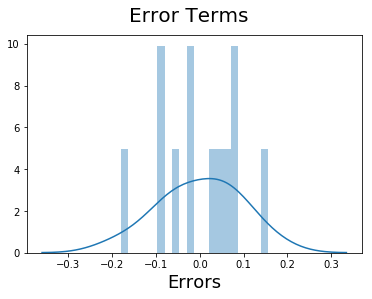

In [26]:
y_train_pred=lr_2.predict(X_train_lm)
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0, 0.5, 'y_pred')

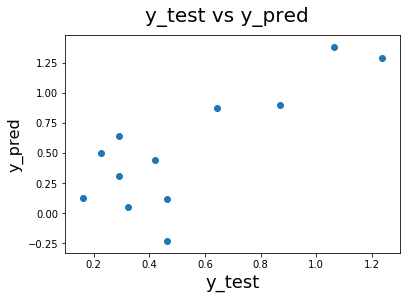

In [27]:
X_test_S6=S6[['MatchesPlayed','Total Points Conceded','Total Points','Successful Raids','Super Raid','Super Tackles','Inflicted','Conceded']]
y_test_S6=S6['Successful Tackles'] 
X_test_m6=sm.add_constant(X_test_S6)
X_test_m6=X_test_m6.drop(['Total Points Conceded','Conceded'],1)
y_pred_test_S6=lr_2.predict(X_test_m6)
fig = plt.figure()
plt.scatter(y_test_S6, y_pred_test_S6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [28]:
y_pred_test_S6

0     0.871753
1     1.380799
2     1.290365
3     0.437924
4     0.894222
5     0.642116
6     0.310320
7     0.499174
8     0.119021
9     0.127133
10    0.049444
11   -0.235321
dtype: float64

Text(0, 0.5, 'y_pred')

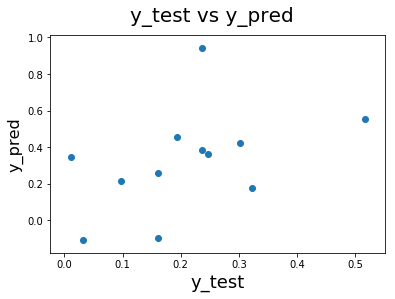

In [29]:
X_test_S7=S7[['MatchesPlayed','Total Points Conceded','Total Points','Successful Raids','Super Raid','Super Tackles','Inflicted','Conceded']]
y_test_S7=S7['Successful Tackles'] 
X_test_m7=sm.add_constant(X_test_S7)
X_test_m7=X_test_m7.drop(['Total Points Conceded','Conceded'],1)
y_pred_test_S7=lr_2.predict(X_test_m7)
fig = plt.figure()
plt.scatter(y_test_S7, y_pred_test_S7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [30]:
S7_pred=S7
S7_pred['Predicted']=y_pred_test_S7
S7_pred

,Team,Total Points,MatchesPlayed,Total Points Conceded,Successful Raids,Successful Tackles,Super Raid,Super Tackles,Inflicted,Conceded,Predicted
0,Dabang Delhi K.C.,0.318584,-0.5,0.064286,0.382353,0.236559,0.142857,-0.117647,0.432432,0.052632,0.942820
1,Bengal Warriors,0.265487,-0.5,-0.064286,0.279412,0.247312,0.476190,0.117647,0.432432,0.000000,0.363636
2,Patna Pirates,0.150442,-0.5,0.107143,0.098039,0.161290,0.380952,0.823529,0.270270,0.368421,-0.092966
3,Bengaluru Bulls,0.150442,-0.5,0.067857,0.127451,0.096774,0.142857,0.882353,0.135135,0.421053,0.217915
4,Haryana Steelers,0.141593,-0.5,0.025000,0.034314,0.236559,0.428571,0.235294,0.270270,0.315789,0.384111
5,Puneri Paltan,0.119469,-0.5,0.292857,0.034314,0.516129,0.047619,0.882353,0.000000,0.842105,0.554480
6,U Mumba,0.066372,-0.5,-0.192857,-0.049020,0.161290,0.095238,0.529412,0.243243,0.210526,0.256805
7,Jaipur Pink Panthers,0.061947,-0.5,0.010714,-0.107843,0.322581,0.095238,1.294118,0.027027,0.315789,0.178000
8,Gujarat Fortunegiants,0.015487,-0.5,-0.178571,-0.088235,0.301075,0.000000,0.411765,0.081081,0.263158,0.421566
9,Tamil Thalaivas,-0.044248,-0.5,0.192857,-0.039216,0.010753,-0.047619,0.176471,-0.108108,0.684211,0.348244


## Most Successful Tackles - Dabang Delhi K.C

## Highest Super - Performance Total Prediction


In [74]:
S5=pd.read_csv(r'I:\Chandra J\Python\Kabbadi_Data\Season5.csv')
S6=pd.read_csv(r'I:\Chandra J\Python\Kabbadi_Data\Season6.csv')
S7=pd.read_csv(r'I:\Chandra J\Python\Kabbadi_Data\Season7.csv')
S5=S5.drop('Unnamed: 0',axis=1)
S6=S6.drop('Unnamed: 0',axis=1)
S7=S7.drop('Unnamed: 0',axis=1)

In [75]:
S5['SuperPerformance']=S5['Super Raid']+S5['Super Tackles']+S5['Inflicted']-S5['Conceded']
S6['SuperPerformance']=S6['Super Raid']+S6['Super Tackles']+S6['Inflicted']-S6['Conceded']
S7['SuperPerformance']=S7['Super Raid']+S7['Super Tackles']+S7['Inflicted']-S7['Conceded']

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

var=['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points','SuperPerformance']

S5[var]=scaler.fit_transform(S5[var])

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [77]:

X_train=S5[['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points']]

y_train=S5['SuperPerformance']

In [78]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:       SuperPerformance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.152e+28
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.63e-29
Time:                        12:25:20   Log-Likelihood:                 406.68
No. Observations:                  12   AIC:                            -793.4
Df Residuals:                       2   BIC:                            -788.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [79]:
X = X_train.drop('Total Points Conceded', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       SuperPerformance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.571e+29
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           2.42e-44
Time:                        12:25:23   Log-Likelihood:                 409.16
No. Observations:                  12   AIC:                            -800.3
Df Residuals:                       3   BIC:                            -796.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1923   2.13

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [80]:
X = X.drop('Successful Tackles', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       SuperPerformance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.693e+30
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           3.55e-61
Time:                        12:25:26   Log-Likelihood:                 423.68
No. Observations:                  12   AIC:                            -831.4
Df Residuals:                       4   BIC:                            -827.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1923   2.07e-16  

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [81]:
X = X.drop('Successful Raids', 1,)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       SuperPerformance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.180e+30
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           3.30e-75
Time:                        12:25:28   Log-Likelihood:                 416.47
No. Observations:                  12   AIC:                            -818.9
Df Residuals:                       5   BIC:                            -815.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1923   2.91e-16    6.6e+14

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


Text(0.5, 0, 'Errors')

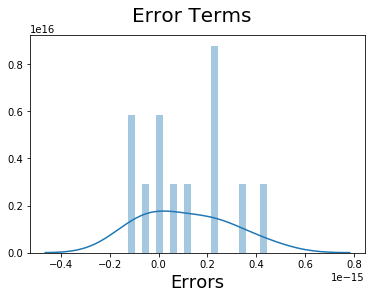

In [82]:
y_train_pred=lr_2.predict(X_train_lm)
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'y_pred')

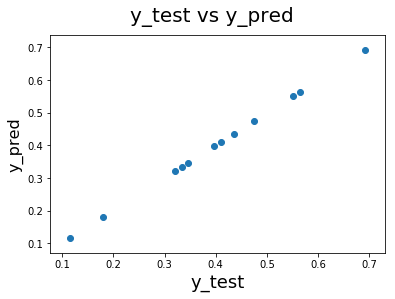

In [83]:
S6_var=['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points','SuperPerformance']
S6[S6_var]=scaler.transform(S6[S6_var])
X_test_S6=S6[['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points']]
y_test_S6=S6['SuperPerformance'] 
X_test_m6=sm.add_constant(X_test_S6)
X_test_m6=X_test_m6.drop(['Total Points Conceded','Successful Tackles','Successful Raids'],1)
y_pred_test_S6=lr_2.predict(X_test_m6)
fig = plt.figure()
plt.scatter(y_test_S6, y_pred_test_S6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [84]:
y_pred_test_S6

0     0.564103
1     0.551282
2     0.692308
3     0.474359
4     0.410256
5     0.333333
6     0.397436
7     0.115385
8     0.346154
9     0.179487
10    0.320513
11    0.435897
dtype: float64

C:\Users\cjyothsna\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'y_pred')

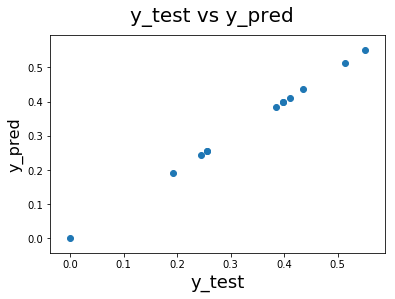

In [85]:
S7_var=['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points','SuperPerformance']
S7[S7_var]=scaler.transform(S7[S7_var])
X_test_S7=S7[['MatchesPlayed','Total Points Conceded','Successful Raids','Successful Tackles','Super Raid','Super Tackles','Inflicted','Conceded','Total Points']]
y_test_S7=S7['SuperPerformance'] 
X_test_m7=sm.add_constant(X_test_S7)
X_test_m7=X_test_m7.drop(['Total Points Conceded','Successful Tackles','Successful Raids'],1)
y_pred_test_S7=lr_2.predict(X_test_m7)
fig = plt.figure()
plt.scatter(y_test_S7, y_pred_test_S7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [86]:
S7_pred=S7
S7_pred['Predicted']=y_pred_test_S7
S7_pred

,Team,Total Points,MatchesPlayed,Total Points Conceded,Successful Raids,Successful Tackles,Super Raid,Super Tackles,Inflicted,Conceded,SuperPerformance,Predicted
0,Dabang Delhi K.C.,0.318584,-0.5,0.064286,0.382353,0.236559,0.142857,-0.117647,0.432432,0.052632,0.397436,3.974359e-01
1,Bengal Warriors,0.265487,-0.5,-0.064286,0.279412,0.247312,0.476190,0.117647,0.432432,0.000000,0.551282,5.512821e-01
2,Patna Pirates,0.150442,-0.5,0.107143,0.098039,0.161290,0.380952,0.823529,0.270270,0.368421,0.512821,5.128205e-01
3,Bengaluru Bulls,0.150442,-0.5,0.067857,0.127451,0.096774,0.142857,0.882353,0.135135,0.421053,0.384615,3.846154e-01
4,Haryana Steelers,0.141593,-0.5,0.025000,0.034314,0.236559,0.428571,0.235294,0.270270,0.315789,0.410256,4.102564e-01
5,Puneri Paltan,0.119469,-0.5,0.292857,0.034314,0.516129,0.047619,0.882353,0.000000,0.842105,0.192308,1.923077e-01
6,U Mumba,0.066372,-0.5,-0.192857,-0.049020,0.161290,0.095238,0.529412,0.243243,0.210526,0.397436,3.974359e-01
7,Jaipur Pink Panthers,0.061947,-0.5,0.010714,-0.107843,0.322581,0.095238,1.294118,0.027027,0.315789,0.435897,4.358974e-01
8,Gujarat Fortunegiants,0.015487,-0.5,-0.178571,-0.088235,0.301075,0.000000,0.411765,0.081081,0.263158,0.256410,2.564103e-01
9,Tamil Thalaivas,-0.044248,-0.5,0.192857,-0.039216,0.010753,-0.047619,0.176471,-0.108108,0.684211,0.000000,-1.775382e-16


## Highest Super Performance - Bengal Warriors 